In [1]:
!pip install ultralytics
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.6/922.6 kB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 65.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

## Downloads data

In [2]:
## Augment dataset

# from roboflow import Roboflow
# rf = Roboflow(api_key="wpyTCC1dQmMKukDdydlo")
# project = rf.workspace("h1-qtgu0").project("food-ingredients-detection-6ce7j-yazes")
# version = project.version(1)
# dataset = version.download("yolov11")

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="wpyTCC1dQmMKukDdydlo")
project = rf.workspace("h1-qtgu0").project("food-ingredients-detection-6ce7j-yazes")
version = project.version(2)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to FOOD-INGREDIENTS-detection-2 in yolov11:: 100%|██████████| 18522/18522 [00:03<00:00, 5195.85it/s]


#EDA

In [3]:
with open('/content/FOOD-INGREDIENTS-detection-2/data.yaml', 'r') as f:
  print(f.read())

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 120
names: ['Akabare Khursani', 'Apple', 'Artichoke', 'Ash Gourd -Kubhindo-', 'Asparagus -Kurilo-', 'Avocado', 'Bacon', 'Bamboo Shoots -Tama-', 'Banana', 'Beans', 'Beaten Rice -Chiura-', 'Beef', 'Beetroot', 'Bethu ko Saag', 'Bitter Gourd', 'Black Lentils', 'Black beans', 'Bottle Gourd -Lauka-', 'Bread', 'Brinjal', 'Broad Beans -Bakullo-', 'Broccoli', 'Buff Meat', 'Butter', 'Cabbage', 'Capsicum', 'Carrot', 'Cassava -Ghar Tarul-', 'Cauliflower', 'Chayote-iskus-', 'Cheese', 'Chicken', 'Chicken Gizzards', 'Chickpeas', 'Chili Pepper -Khursani-', 'Chili Powder', 'Chowmein Noodles', 'Cinnamon', 'Coriander -Dhaniya-', 'Corn', 'Cornflakes', 'Crab Meat', 'Cucumber', 'Egg', 'Farsi ko Munta', 'Fiddlehead Ferns -Niguro-', 'Fish', 'Garden Peas', 'Garden cress-Chamsur ko saag-', 'Garlic', 'Ginger', 'Green Brinjal', 'Green Lentils', 'Green Mint -Pudina-', 'Green Peas', 'Green Soyabean -Hariyo Bhatmas-', 'Gundruk', 'Ham', 'Ice', 'Jac

In [4]:
names = ['Akabare Khursani', 'Apple', 'Artichoke', 'Ash Gourd -Kubhindo-', 'Asparagus -Kurilo-', 'Avocado', 'Bacon', 'Bamboo Shoots -Tama-', 'Banana', 'Beans', 'Beaten Rice -Chiura-', 'Beef', 'Beetroot', 'Bethu ko Saag', 'Bitter Gourd', 'Black Lentils', 'Black beans', 'Bottle Gourd -Lauka-', 'Bread', 'Brinjal', 'Broad Beans -Bakullo-', 'Broccoli', 'Buff Meat', 'Butter', 'Cabbage', 'Capsicum', 'Carrot', 'Cassava -Ghar Tarul-', 'Cauliflower', 'Chayote-iskus-', 'Cheese', 'Chicken', 'Chicken Gizzards', 'Chickpeas', 'Chili Pepper -Khursani-', 'Chili Powder', 'Chowmein Noodles', 'Cinnamon', 'Coriander -Dhaniya-', 'Corn', 'Cornflakes', 'Crab Meat', 'Cucumber', 'Egg', 'Farsi ko Munta', 'Fiddlehead Ferns -Niguro-', 'Fish', 'Garden Peas', 'Garden cress-Chamsur ko saag-', 'Garlic', 'Ginger', 'Green Brinjal', 'Green Lentils', 'Green Mint -Pudina-', 'Green Peas', 'Green Soyabean -Hariyo Bhatmas-', 'Gundruk', 'Ham', 'Ice', 'Jack Fruit', 'Ketchup', 'Lapsi -Nepali Hog Plum-', 'Lemon -Nimbu-', 'Lime -Kagati-', 'Long Beans -Bodi-', 'Masyaura', 'Milk', 'Minced Meat', 'Moringa Leaves -Sajyun ko Munta-', 'Mushroom', 'Mutton', 'Nutrela -Soya Chunks-', 'Okra -Bhindi-', 'Olive Oil', 'Onion', 'Onion Leaves', 'Orange', 'Palak -Indian Spinach-', 'Palungo -Nepali Spinach-', 'Paneer', 'Papaya', 'Pea', 'Pear', 'Pointed Gourd -Chuche Karela-', 'Pork', 'Potato', 'Pumpkin -Farsi-', 'Radish', 'Rahar ko Daal', 'Rayo ko Saag', 'Red Beans', 'Red Lentils', 'Rice -Chamal-', 'Sajjyun -Moringa Drumsticks-', 'Salt', 'Sausage', 'Snake Gourd -Chichindo-', 'Soy Sauce', 'Soyabean -Bhatmas-', 'Sponge Gourd -Ghiraula-', 'Stinging Nettle -Sisnu-', 'Strawberry', 'Sugar', 'Sweet Potato -Suthuni-', 'Taro Leaves -Karkalo-', 'Taro Root-Pidalu-', 'Thukpa Noodles', 'Tofu', 'Tomato', 'Tori ko Saag', 'Tree Tomato -Rukh Tamatar-', 'Turnip', 'Wallnut', 'Water Melon', 'Wheat', 'Yellow Lentils', 'kimchi', 'mayonnaise', 'noodle', 'seaweed']


In [6]:
import os
len(os.listdir('/content/FOOD-INGREDIENTS-detection-2/train/labels')), len(os.listdir('/content/FOOD-INGREDIENTS-detection-2/valid/labels')), len(os.listdir('/content/FOOD-INGREDIENTS-detection-2/test/labels'))

(7399, 1029, 827)

In [17]:
count = [0] * len(names)
count_images = [0] *len(names)
for file in os.listdir('/content/FOOD-INGREDIENTS-detection-2/train/labels'):
  with open(f'/content/FOOD-INGREDIENTS-detection-2/train/labels/{file}', 'r') as f:
    lines = f.readlines()
    tmp = []
    for line in lines:
      count[int(line.split()[0])] += 1
      tmp.append(int(line.split()[0]))
    for id in set(tmp):
      count_images[id] += 1


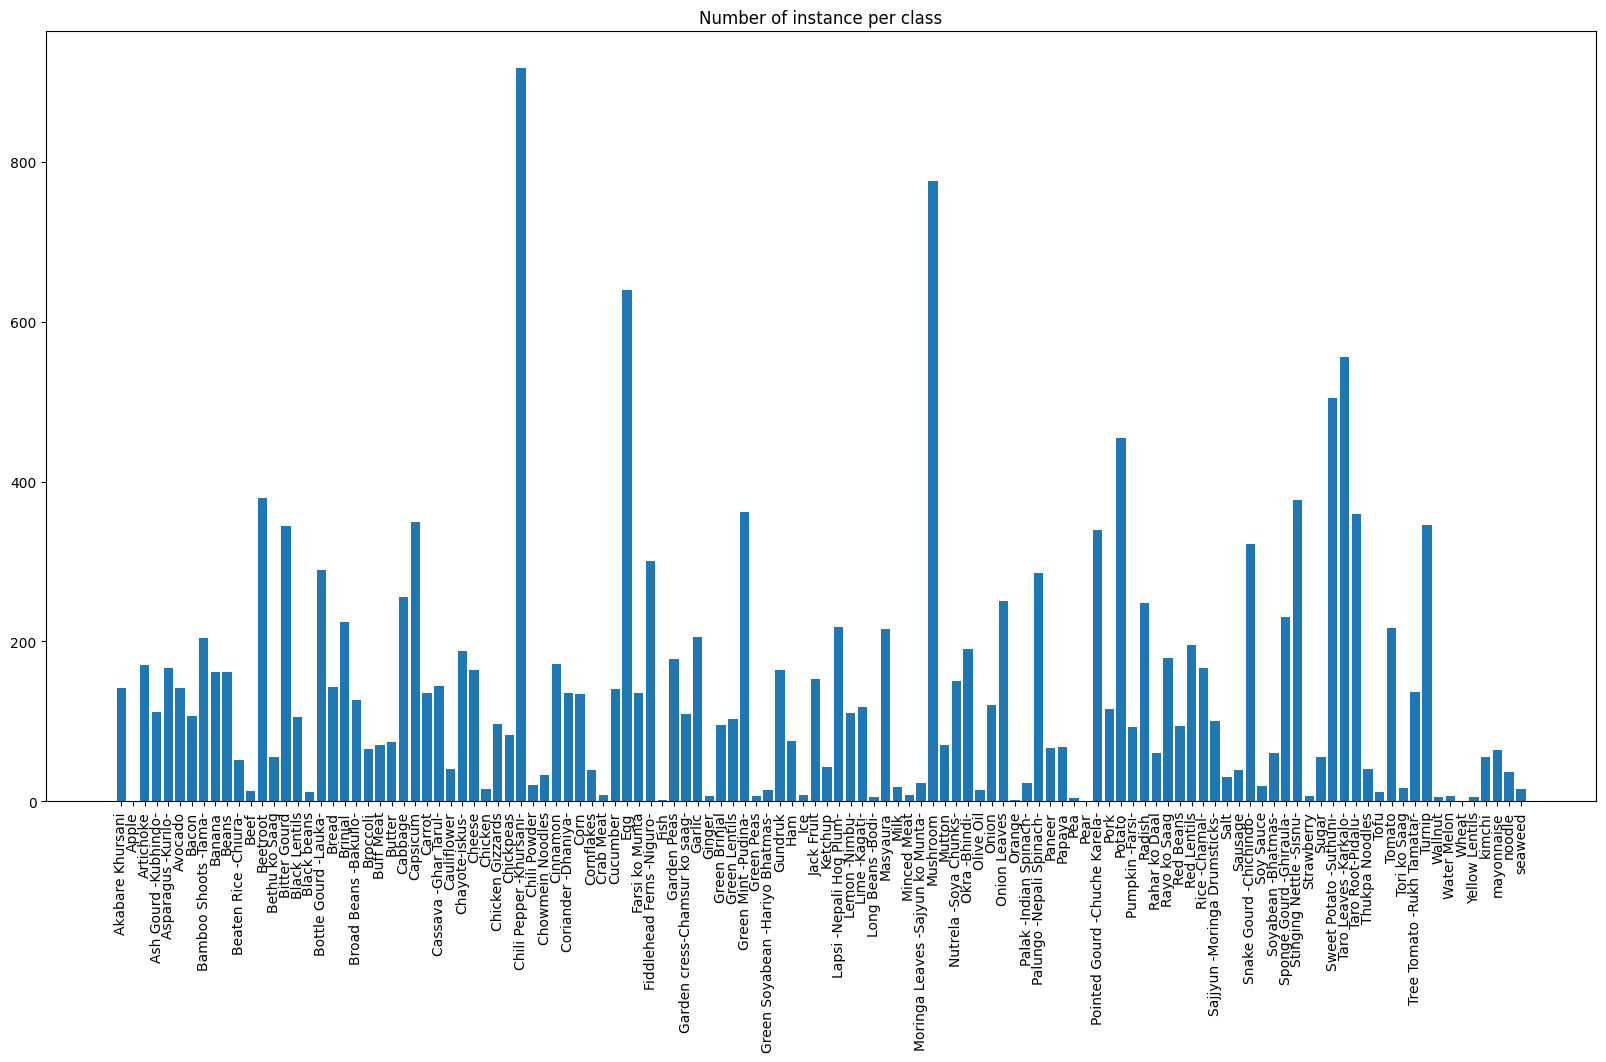

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.bar(names, count)
plt.xticks(rotation=90)
plt.title('Number of instance per class')
plt.show()


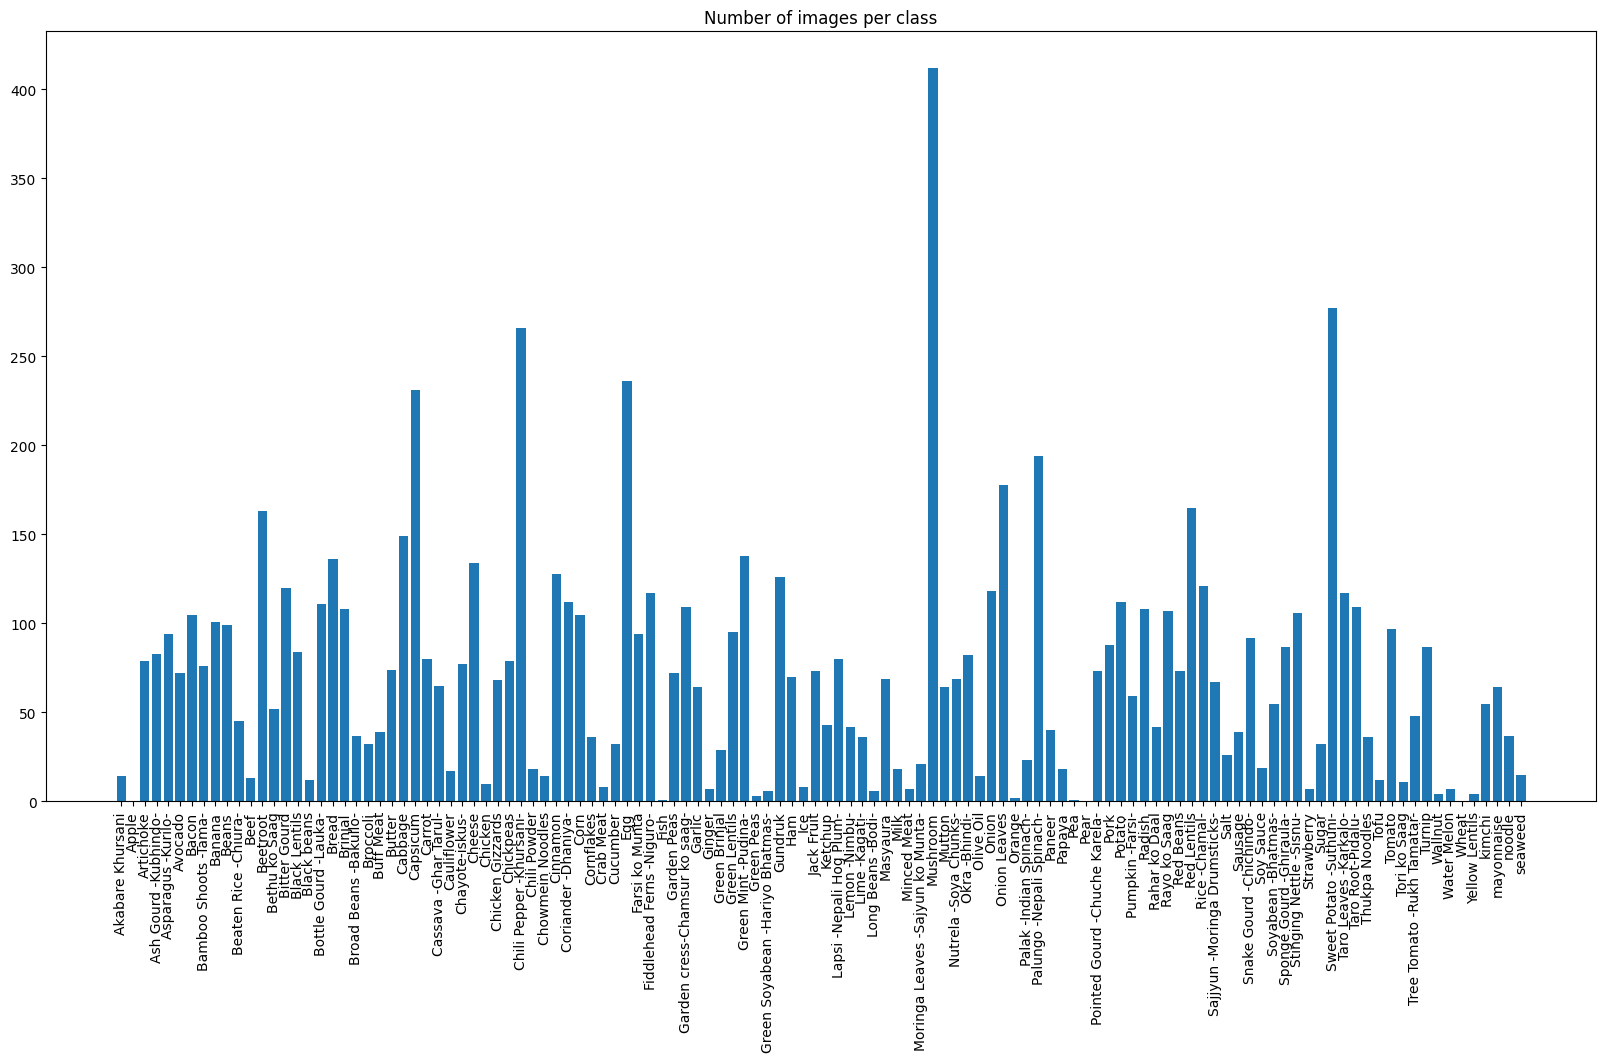

In [19]:
plt.figure(figsize=(20, 10))
plt.bar(names, count_images)
plt.xticks(rotation=90)
plt.title('Number of images per class')
plt.show()


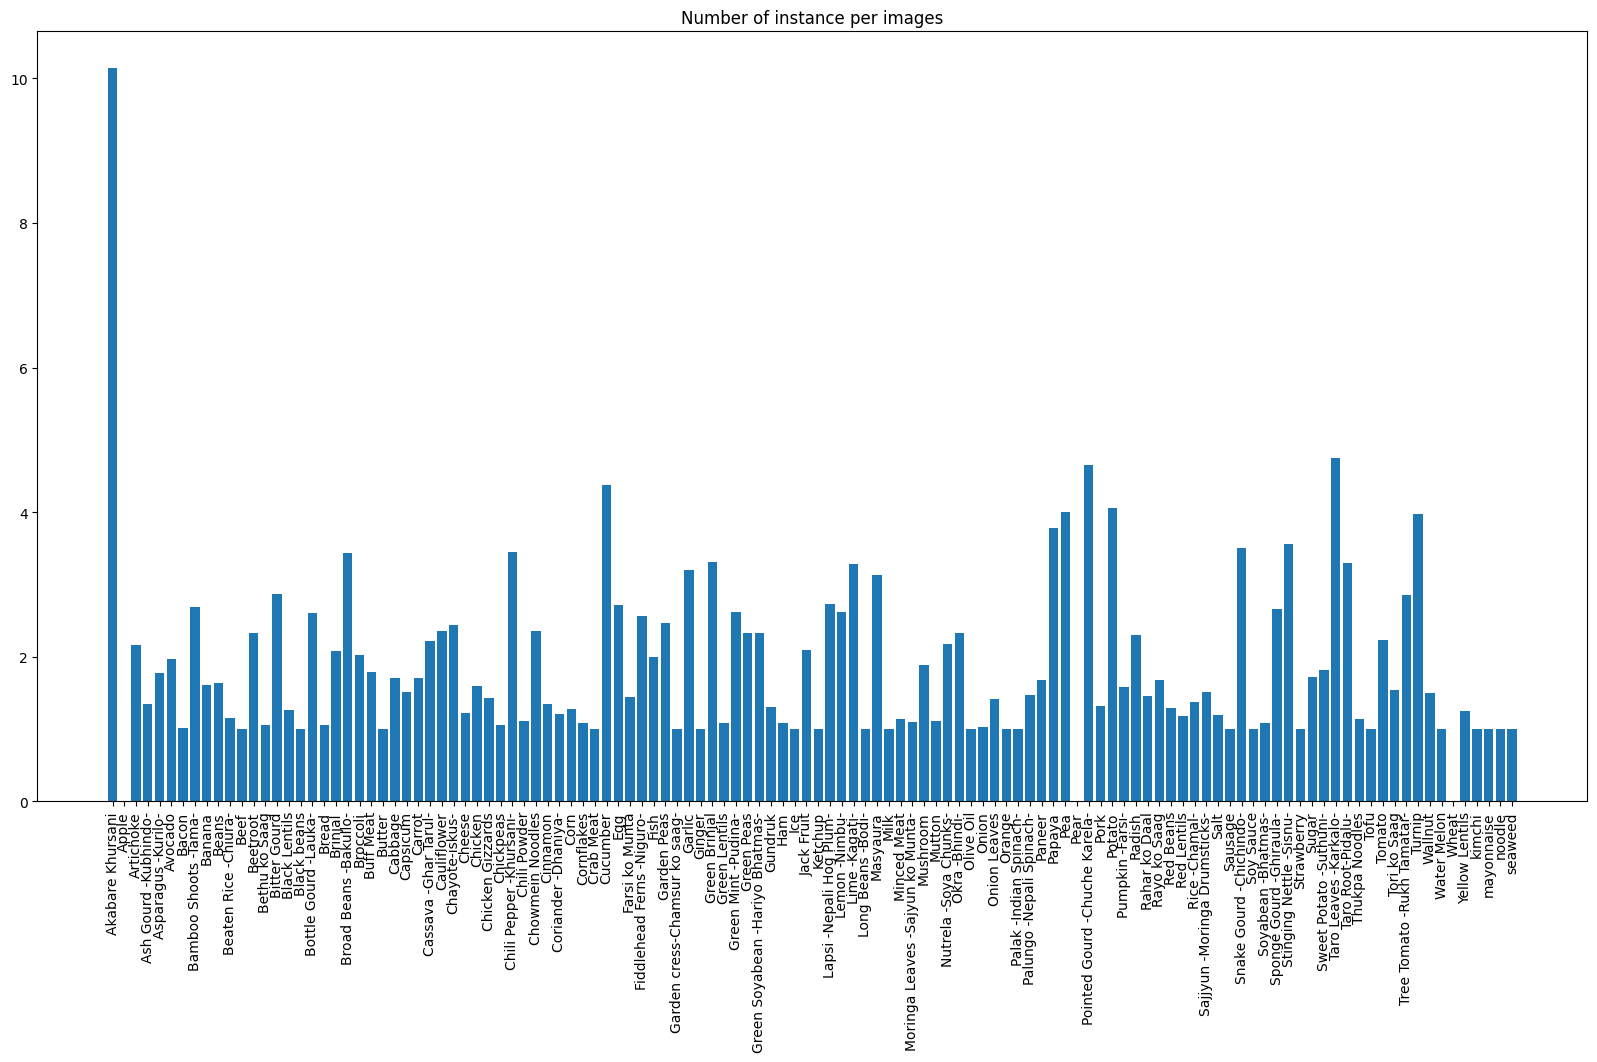

In [20]:
rates = [0] * len(names)
for i in range(len(names)):
  if count_images[i] == 0:
    continue
  rates[i] = count[i] / count_images[i]
plt.figure(figsize=(20, 10))
plt.bar(names, rates)
plt.xticks(rotation=90)
plt.title('Number of instance per images')
plt.show()

## Load model

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

model_yolo = YOLO('yolo11n.pt')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.35M/5.35M [00:00<00:00, 295MB/s]


## Train!

In [ ]:
model_yolo.train(data='/content/FOOD-INGREDIENTS-detection-2/data.yaml', epochs=200, batch=64)

Ultralytics 8.3.80 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/FOOD-INGREDIENTS-detection-2/data.yaml, epochs=200, time=None, patience=100, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show

100%|██████████| 755k/755k [00:00<00:00, 114MB/s]


Overriding model.yaml nc=80 with nc=120

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralyti

train: Scanning /content/FOOD-INGREDIENTS-detection-2/train/labels... 7399 images, 14 backgrounds, 0 corrupt: 100%|██████████| 7399/7399 [00:03<00:00, 2441.61it/s]


train: New cache created: /content/FOOD-INGREDIENTS-detection-2/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 702, len(boxes) = 17307. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/FOOD-INGREDIENTS-detection-2/valid/labels... 1029 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1029/1029 [00:00<00:00, 1077.88it/s]

val: New cache created: /content/FOOD-INGREDIENTS-detection-2/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 121, len(boxes) = 2490. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      10.6G      1.583      5.111      1.843        160        640: 100%|██████████| 116/116 [02:08<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:11<00:00,  1.26s/it]


                   all       1029       2490    0.00577     0.0571    0.00552    0.00304

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200        10G      1.582      4.688      1.845        128        640: 100%|██████████| 116/116 [02:12<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:12<00:00,  1.34s/it]


                   all       1029       2490      0.426     0.0801     0.0305     0.0147

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      10.3G      1.742       4.04      1.972        189        640: 100%|██████████| 116/116 [02:03<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:21<00:00,  2.37s/it]


                   all       1029       2490      0.519     0.0455     0.0114    0.00521

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      10.5G      1.778       3.77       1.99        175        640: 100%|██████████| 116/116 [02:02<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:18<00:00,  2.11s/it]


                   all       1029       2490      0.293      0.129     0.0391     0.0186

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200      10.3G      1.728      3.482      1.937        154        640: 100%|██████████| 116/116 [02:03<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:11<00:00,  1.31s/it]


                   all       1029       2490      0.487      0.107     0.0646      0.034

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      10.1G      1.695      3.269      1.903        185        640: 100%|██████████| 116/116 [02:01<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:11<00:00,  1.27s/it]


                   all       1029       2490      0.409      0.213      0.147     0.0773

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      10.3G      1.672      3.101      1.881        308        640:  59%|█████▊    | 68/116 [01:11<00:51,  1.08s/it]

## Convert sang onnx

In [ ]:
model = YOLO("/content/runs/detect/train/weights/best.pt")  # load a custom trained model

# Export the model
model.export(format="onnx")